## Classifying shots to see if I can predict whether they result in goals or not

In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as lt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [86]:
events = pd.read_csv('../data/cleaned-data/events_cleaned.csv', low_memory=False)

In [87]:
events

,season_name,match_id,id,index,period,minute,second,duration,related_events,location,pass,carry,under_pressure,dribble,ball_receipt,out,clearance,duel,miscontrol,shot,goalkeeper,counterpress,ball_recovery,foul_won,off_camera,foul_committed,block,interception,substitution,bad_behaviour,50_50,injury_stoppage,half_start,player_off,half_end,type_id,type_name,play_pattern_id,play_pattern_name,team_id,team_name,player_id,player_name,position_id,position_name,formation,lineup,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,player_10
0,2017/2018,9592,62fcd4a2-94ed-42f0-9c4e-d994ae217440,1,1,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Starting XI,1,Regular Play,217,Barcelona,0,0,0,0,442,"[{'player': {'id': 20055, 'name': 'Marc-André ...","{'player': {'id': 20055, 'name': 'Marc-André t...","{'player': {'id': 6374, 'name': 'Nélson Cabral...","{'player': {'id': 5213, 'name': 'Gerard Piqué ...","{'player': {'id': 5492, 'name': 'Samuel Yves U...","{'player': {'id': 5211, 'name': 'Jordi Alba Ra...","{'player': {'id': 5470, 'name': 'Ivan Rakitić'...","{'player': {'id': 5203, 'name': 'Sergio Busque...","{'player': {'id': 3726, 'name': 'Gerard Deulof...","{'player': {'id': 5216, 'name': 'Andrés Iniest...","{'player': {'id': 5503, 'name': 'Lionel Andrés...","{'player': {'id': 5246, 'name': 'Luis Alberto ..."
1,2017/2018,9592,dcd47e2f-6a76-499e-abee-413417bd067e,2,1,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,Starting XI,1,Regular Play,214,Espanyol,0,0,0,0,442,"[{'player': {'id': 6792, 'name': 'Pau López Sa...","{'player': {'id': 6792, 'name': 'Pau López Sab...","{'player': {'id': 6758, 'name': 'Víctor Sánche...","{'player': {'id': 6754, 'name': 'David López S...","{'player': {'id': 6790, 'name': 'Mario Hermoso...","{'player': {'id': 6757, 'name': 'Aarón Martín ...","{'player': {'id': 6763, 'name': 'Pablo Daniel ...","{'player': {'id': 6867, 'name': 'Papa Kouly Di...","{'player': {'id': 6751, 'name': 'Javier Fuego ...","{'player': {'id': 3236, 'name': 'Sergi Darder ...","{'player': {'id': 6761, 'name': 'Leonardo Carr...","{'player': {'id': 6766, 'name': 'Gerard Moreno..."
2,2017/2018,9592,1d6e44c2-fb77-479e-bb98-851952e9b3f9,3,1,0,0,0.000000,['d8eaa47d-d089-45a6-b3b4-a59ab8f65a6a'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,Half Start,1,Regular Play,214,Espanyol,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017/2018,9592,d8eaa47d-d089-45a6-b3b4-a59ab8f65a6a,4,1,0,0,0.000000,['1d6e44c2-fb77-479e-bb98-851952e9b3f9'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,Half Start,1,Regular Play,217,Barcelona,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017/2018,9592,547584c5-1b05-46ce-b61a-cd124d20b385,5,1,0,7,0.806000,['40265cdf-29b5-4e8a-8e9d-1d53a750ff51'],"[61.0, 41.0]","{'recipient': {'id': 5203, 'name': 'Sergio Bus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Pass,9,From Kick Off,217,Barcelona,5246,Luis Alberto Suárez Díaz,24,Left Center Forward,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825454,2019/2020,303731,bbcfd05f-b1b3-4c8c-8164-131f66073442,3686,2,91,56,0.000000,['9bbe3056-7489-489d-bfbb-0bb98730bb66'],"[40.5, 53.8]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'outcome': {'id': 16, 'name': 'Success In Pla...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Interception,1,Regular Play,322,Eibar,7105,Fabián Ariel Orellana Valenzuela,17,Right Wing,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1

Subset dataframe to only include shots from Barcelona & drop unwanted columns

In [88]:
shots = events[events['team_name'] == 'Barcelona']
shots = shots[['season_name', 'match_id', 'id', 'location', 'shot', 'play_pattern_name', 'player_id', 'player_name']]
shots = shots[shots['shot'].notnull()]
shots

,season_name,match_id,id,location,shot,play_pattern_name,player_id,player_name
104,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]","{'statsbomb_xg': 0.026398562, 'end_location': ...",From Corner,5503,Lionel Andrés Messi Cuccittini
793,2017/2018,9592,4a9dc002-2667-47b1-b667-8c45d2b0f529,"[90.0, 29.1]","{'statsbomb_xg': 0.02504274, 'end_location': [...",From Free Kick,5246,Luis Alberto Suárez Díaz
1175,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]","{'statsbomb_xg': 0.48425599999999996, 'end_loc...",From Throw In,5503,Lionel Andrés Messi Cuccittini
1259,2017/2018,9592,ce357c7c-6df2-4550-8368-213d35e8763a,"[96.0, 21.1]","{'statsbomb_xg': 0.04670301, 'end_location': [...",From Free Kick,5246,Luis Alberto Suárez Díaz
1316,2017/2018,9592,81af3ea9-1754-4b51-9198-880c533d12cb,"[106.0, 39.6]","{'statsbomb_xg': 0.33415136, 'end_location': [...",From Free Kick,5470,Ivan Rakitić
...,...,...,...,...,...,...,...,...
1823978,2019/2020,303731,497856b8-b067-46f0-a05d-0460263776e8,"[114.5, 32.9]","{'statsbomb_xg': 0.25050905, 'end_location': [...",From Free Kick,5470,Ivan Rakitić
1824915,2019/2020,303731,8034279a-0e32-4be1-8f1d-433a5984e056,"[91.4, 37.9]","{'statsbomb_xg': 0.06750548, 'end_location': [...",From Free Kick,5503,Lionel Andrés Messi Cuccittini
1825261,2019/2020,303731,17c2fd69-d646-41c9-8b1f-b34c210463dd,"[116.2, 36.1]","{'open_goal': True, 'statsbomb_xg': 0.83538634...",Regular Play,5503,Lionel Andrés Messi Cuccittini
1825323,2019/2020,303731,01b7fed8-2356-4480-8c1b-53ca8aea55a4,"[110.7, 29.4]","{'one_on_one': True, 'statsbomb_xg': 0.3648129...",Regular Play,4447,Martin Braithwaite Christensen


Transform 'shot' column from string to dictionary, then split the column into sub-columns based on dictionaries

In [90]:
import ast
shots['shot'] = [ast.literal_eval(i) for i in shots['shot']]
shot_split = shots['shot'].apply(pd.Series)
shot_split.head()

,statsbomb_xg,end_location,key_pass_id,type,body_part,technique,outcome,freeze_frame,first_time,aerial_won,one_on_one,open_goal,redirect,deflected,saved_to_post,saved_off_target,follows_dribble
104,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,"{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 98, 'name': 'Off T'}","[{'location': [97.9, 55.4], 'player': {'id': 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,0.025043,"[119.3, 37.5, 2.2]",NaN,"{'id': 62, 'name': 'Free Kick'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 100, 'name': 'Saved'}","[{'location': [102.9, 51.8], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1175,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,"{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}","[{'location': [117.9, 40.2], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259,0.046703,"[105.8, 27.5]",NaN,"{'id': 62, 'name': 'Free Kick'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 96, 'name': 'Blocked'}","[{'location': [106.6, 49.3], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1316,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,"{'id': 87, 'name': 'Open Play'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 100, 'name': 'Saved'}","[{'location': [94.6, 39.6], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Subset dataframe,  selecting only the columns required

In [91]:
shot_split = shot_split[shot_split.columns[:7]].copy()
shot_split.head()

,statsbomb_xg,end_location,key_pass_id,type,body_part,technique,outcome
104,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,"{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 98, 'name': 'Off T'}"
793,0.025043,"[119.3, 37.5, 2.2]",NaN,"{'id': 62, 'name': 'Free Kick'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 100, 'name': 'Saved'}"
1175,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,"{'id': 87, 'name': 'Open Play'}","{'id': 38, 'name': 'Left Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 97, 'name': 'Goal'}"
1259,0.046703,"[105.8, 27.5]",NaN,"{'id': 62, 'name': 'Free Kick'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 96, 'name': 'Blocked'}"
1316,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,"{'id': 87, 'name': 'Open Play'}","{'id': 40, 'name': 'Right Foot'}","{'id': 93, 'name': 'Normal'}","{'id': 100, 'name': 'Saved'}"


Subset dataframe and split columns containing dictionaries

In [92]:
type_df = shot_split['type'].apply(pd.Series).add_prefix('type_')
body_part_df = shot_split['body_part'].apply(pd.Series).add_prefix('body_part_')
technique_df = shot_split['technique'].apply(pd.Series).add_prefix('technique_')
outcome_df = shot_split['outcome'].apply(pd.Series).add_prefix('outcome_')

Concat expanded dataframes back togther and drop redundant columns

In [93]:
shot_split = pd.concat([shot_split, type_df, body_part_df, technique_df, outcome_df], axis=1).drop(
    columns = ['type', 'body_part', 'technique', 'outcome'])
shot_split.head()

,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name
104,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T
793,0.025043,"[119.3, 37.5, 2.2]",NaN,62,Free Kick,40,Right Foot,93,Normal,100,Saved
1175,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal
1259,0.046703,"[105.8, 27.5]",NaN,62,Free Kick,40,Right Foot,93,Normal,96,Blocked
1316,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,87,Open Play,40,Right Foot,93,Normal,100,Saved


Drop 'shot' column

In [94]:
shots = pd.concat([shots, shot_split], axis=1).drop(columns = ['shot'])
shots.head()

,season_name,match_id,id,location,play_pattern_name,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name
104,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",From Corner,5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T
793,2017/2018,9592,4a9dc002-2667-47b1-b667-8c45d2b0f529,"[90.0, 29.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.025043,"[119.3, 37.5, 2.2]",NaN,62,Free Kick,40,Right Foot,93,Normal,100,Saved
1175,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal
1259,2017/2018,9592,ce357c7c-6df2-4550-8368-213d35e8763a,"[96.0, 21.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.046703,"[105.8, 27.5]",NaN,62,Free Kick,40,Right Foot,93,Normal,96,Blocked
1316,2017/2018,9592,81af3ea9-1754-4b51-9198-880c533d12cb,"[106.0, 39.6]",From Free Kick,5470,Ivan Rakitić,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,87,Open Play,40,Right Foot,93,Normal,100,Saved


Assign dummy variable to the 'outcome_name' column

In [95]:
shots['goal'] = np.where(shots['outcome_name'] == 'Goal', 1, 0)

Look at null values

In [96]:
shots.isnull().sum()

season_name             0
match_id                0
id                      0
location                0
play_pattern_name       0
player_id               0
player_name             0
statsbomb_xg            0
end_location            0
key_pass_id          2144
type_id                 0
type_name               0
body_part_id            0
body_part_name          0
technique_id            0
technique_name          0
outcome_id              0
outcome_name            0
goal                    0
dtype: int64

Fill null values in 'key_pass_id' column with zeros

In [97]:
shots['key_pass_id'] = shots['key_pass_id'].fillna(0)

Check data types are correct

In [98]:
shots.dtypes

season_name           object
match_id               int64
id                    object
location              object
play_pattern_name     object
player_id              int64
player_name           object
statsbomb_xg         float64
end_location          object
key_pass_id           object
type_id                int64
type_name             object
body_part_id           int64
body_part_name        object
technique_id           int64
technique_name        object
outcome_id             int64
outcome_name          object
goal                   int32
dtype: object

Subset to only shots from Messi

In [99]:
messi_shots = shots[shots['player_id'] == 5503].copy()
messi_shots

,season_name,match_id,id,location,play_pattern_name,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name,goal
104,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",From Corner,5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T,0
1175,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
1322,2017/2018,9592,076ce5b0-d566-4378-9839-8186ec060da2,"[115.1, 48.4]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.113160,"[115.9, 47.0]",0,87,Open Play,40,Right Foot,93,Normal,96,Blocked,0
1491,2017/2018,9592,5656d749-a0c6-4469-bdea-a07ab0919ba9,"[116.1, 33.8]",Regular Play,5503,Lionel Andrés Messi Cuccittini,0.178780,"[120.0, 39.6, 0.2]",0c0db095-ab96-4056-b48b-33145397b7fc,87,Open Play,40,Right Foot,93,Normal,97,Goal,1
2170,2017/2018,9592,c2880ca3-e61a-4a89-8714-4c1fc8dc6620,"[105.2, 36.8]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.084705,"[106.6, 37.1]",5c1e91a3-5c0c-4507-a966-32387eece9f5,87,Open Play,38,Left Foot,91,Half Volley,96,Blocked,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822462,2019/2020,303731,cf0fc241-1826-4478-abde-b9780d25e125,"[106.0, 34.8]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.262575,"[120.0, 43.5, 0.6000000000000001]",5c227063-fa17-4b80-b23b-88169fc869ba,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
1823466,2019/2020,303731,e43a2545-f307-4bb9-a810-01afb1498351,"[111.7, 27.3]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.128058,"[120.0, 43.6, 0.2]",e9cdf134-be7b-4693-a769-4eccc3b543f7,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
1823527,2019/2020,303731,1c0c7ac1-f01c-4f6d-9c51-3e97154fa119,"[110.5, 43.7]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.488662,"[120.0, 39.6, 0.30000000000000004]",0,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
1824915,2019/2020,303731,8034279a-0e32-4be1-8f1d-433a5984e056,"[91.4, 37.9]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.067505,"[119.4, 38.2, 3.4]",0,62,Free Kick,38,Left Foot,93,Normal,115,Saved Off Target,0


Save dataframe to CSV file

In [100]:
shots = shots.to_csv('../data/cleaned-data/all_shots.csv', index=False)
messi_shots = messi_shots.to_csv('../data/cleaned-data/messi_shots.csv', index=False)

# All Barcelona shots

In [101]:
shots = pd.read_csv('../data/cleaned-data/all_shots.csv', low_memory=False)
shots.head()

,season_name,match_id,id,location,play_pattern_name,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name,goal
0,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",From Corner,5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T,0
1,2017/2018,9592,4a9dc002-2667-47b1-b667-8c45d2b0f529,"[90.0, 29.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.025043,"[119.3, 37.5, 2.2]",0,62,Free Kick,40,Right Foot,93,Normal,100,Saved,0
2,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
3,2017/2018,9592,ce357c7c-6df2-4550-8368-213d35e8763a,"[96.0, 21.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.046703,"[105.8, 27.5]",0,62,Free Kick,40,Right Foot,93,Normal,96,Blocked,0
4,2017/2018,9592,81af3ea9-1754-4b51-9198-880c533d12cb,"[106.0, 39.6]",From Free Kick,5470,Ivan Rakitić,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,87,Open Play,40,Right Foot,93,Normal,100,Saved,0


Categorise columns/variables

In [102]:
id_col = ['id']
target_col = ['goal']
cat_cols = ['season_name', 'play_pattern_name', 'player_name', 'type_name', 'body_part_name', 'technique_name']
num_cols = ['statsbomb_xg']

Data pre-processing using scikit-learn

In [104]:
from sklearn.preprocessing import StandardScaler

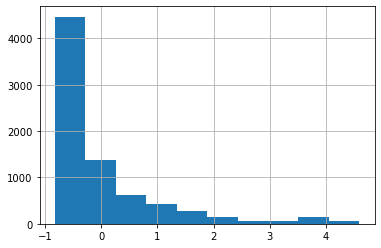

In [105]:
std = StandardScaler()
scaled_fit = std.fit(shots[num_cols])

pd.DataFrame(scaled_fit.transform(shots[num_cols]), columns=num_cols)['statsbomb_xg'].hist();

Assign dummy variables to category columns

In [106]:
shots = pd.get_dummies(data=shots, columns=cat_cols, drop_first=True)
shots

,match_id,id,location,player_id,statsbomb_xg,end_location,key_pass_id,type_id,body_part_id,technique_id,outcome_id,outcome_name,goal,season_name_2005/2006,season_name_2006/2007,season_name_2007/2008,season_name_2008/2009,season_name_2009/2010,season_name_2010/2011,season_name_2011/2012,season_name_2012/2013,season_name_2013/2014,season_name_2014/2015,season_name_2015/2016,season_name_2016/2017,season_name_2017/2018,season_name_2018/2019,season_name_2019/2020,play_pattern_name_From Counter,play_pattern_name_From Free Kick,play_pattern_name_From Goal Kick,play_pattern_name_From Keeper,play_pattern_name_From Kick Off,play_pattern_name_From Throw In,play_pattern_name_Other,play_pattern_name_Regular Play,player_name_Adriano Correia Claro,player_name_Aleix Vidal Parreu,player_name_Alexandre Dimitri Song-Billong,player_name_Alexis Alejandro Sánchez Sánchez,player_name_Aliaksandr Hleb,player_name_Anderson Luís de Souza,player_name_André Filipe Tavares Gomes,player_name_Andrés Iniesta Luján,player_name_Anssumane Fati,player_name_Antoine Griezmann,player_name_Arda Turan,player_name_Arthur Henrique Ramos de Oliveira Melo,player_name_Arturo Erasmo Vidal Pardo,player_name_Bojan Krkíc Pérez,player_name_Carles Aleña Castillo,player_name_Carles Puyol i Saforcada,player_name_Carles Pérez Sayol,player_name_Clément Lenglet,player_name_Cristian Tello Herrera,player_name_Daniel Alves da Silva,player_name_David Villa Sánchez,player_name_Denis Suárez Fernández,player_name_Dmytro Chygrynskiy,player_name_Eiður Smári Guðjohnsen,player_name_Eric-Sylvain Bilal Abidal,player_name_Francesc Fàbregas i Soler,player_name_Francisco Alcácer García,player_name_Frenkie de Jong,player_name_Gabriel Alejandro Milito,player_name_Gabriel Francisco García de la Torre,player_name_Gerard Deulofeu Lázaro,player_name_Gerard Piqué Bernabéu,player_name_Gianluca Zambrotta,player_name_Giovani dos Santos Ramírez,player_name_Giovanni van Bronckhorst,player_name_Gnégnéri Yaya Touré,player_name_Henrik Larsson,player_name_Héctor Junior Firpo Adames,player_name_Ibrahim Afellay,player_name_Ivan Rakitić,player_name_Javier Alejandro Mascherano,player_name_Javier Pedro Saviola Fernández,player_name_Jeffren Isaac Suárez Bermúdez,player_name_Jonathan dos Santos Ramírez,player_name_Jordi Alba Ramos,player_name_José Edmílson Gomes de Moraes,player_name_José Manuel Rueda Sampedro,player_name_José Martín Cáceres Silva,player_name_José Paulo Bezzera Maciel Júnior,player_name_Juan Isaac Cuenca López,player_name_Juliano Haus Belletti,player_name_Jérémy Mathieu,player_name_Kevin-Prince Boateng,player_name_Lionel Andrés Messi Cuccittini,player_name_Lucas Digne,player_name_Ludovic Giuly,player_name_Luis Alberto Suárez Díaz,player_name_Malcom Filipe Silva de Oliveira,player_name_Manuel Agudo Durán,player_name_Marc Bartra Aregall,player_name_Mark van Bommel,player_name_Martin Braithwaite Christensen,player_name_Martín Montoya Torralbo,player_name_Maximiliano Gastón López,player_name_Maxwell Scherrer Cabelino Andrade,player_name_Munir El Haddadi Mohamed,player_name_Neymar da Silva Santos Junior,player_name_Nélson Cabral Semedo,player_name_Oleguer Presas Renom,player_name_Ousmane Dembélé,player_name_Pedro Eliezer Rodríguez Ledesma,player_name_Philippe Coutinho Correia,player_name_Rafael Alcântara do Nascimento,player_name_Rafael Márquez Álvarez,player_name_Ricard Puig Martí,player_name_Ronald Federico Araújo da Silva,player_name_Ronaldo de Assis Moreira,"player_name_Samuel Eto""o Fils",player_name_Samuel Yves Umtiti,player_name_Sandro Ramírez Castillo,player_name_Santiago Ezquerro Marín,player_name_Sergi Roberto Carnicer,player_name_Sergio Busquets i Burgos,player_name_Seydou Kéita,player_name_Sylvio Mendes Campos Junior,player_name_Thiago Alcântara do Nascimento,player_name_Thiago Motta,player_name_Thierry Henry,player_name_Thomas Vermaelen,player_name_Xavier Hernández Creus,player_name_Yerry Fernando Mina González,player_name_Zlatan Ibrahimović,type_name_Free Kick,type_name_Open Play,type_name_Penalt

Create boolean columns category

In [107]:
bool_cols = [col for col in shots.nunique()[shots.nunique() == 2].keys() if col not in target_col]

Split dataset into training and test

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
train, test = train_test_split(shots, test_size=.2, random_state=7)

In [111]:
train_X = train[bool_cols + num_cols].reset_index(drop=True)
train_y = train[target_col].reset_index(drop=True)

test_X = test[bool_cols + num_cols].reset_index(drop=True)
test_y = test[target_col].reset_index(drop=True)

Train model (Logistic Regression)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

lr.predict(test_X)[:10]
test_y[:10]

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,goal
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [115]:
accuracy_score(test_y, lr.predict(test_X))

0.8674069235793599

In [116]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [117]:
lr.predict_proba(test_X)[:10]

array([[0.84656475, 0.15343525],
       [0.73205385, 0.26794615],
       [0.86786551, 0.13213449],
       [0.9211349 , 0.0788651 ],
       [0.93905362, 0.06094638],
       [0.92479933, 0.07520067],
       [0.93210416, 0.06789584],
       [0.47810232, 0.52189768],
       [0.97290307, 0.02709693],
       [0.93803702, 0.06196298]])

Train model (other models)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [36]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
         'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1)}

Function to compute average balanced score of a model:

In [37]:
def validate_model(model, X, y):
    validation_results = cross_validate(model, X, y.values.ravel(), cv=5, scoring='accuracy')
    acc = validation_results['test_score'].mean()
    print(f'Mean Balanced Accuracy Score: {acc}')

#Function to evaluate models
def evaluate_models(models, X, y):
    for key, value in models.items():
        print(f'Model: {key}')
        validate_model(value, X, y)
        print('____________\n')

In [38]:
evaluate_models(models, train_X, train_y)

Model: Logistic Regression


C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean Balanced Accuracy Score: 0.8585886354541816
____________

Model: Decision Tree
Mean Balanced Accuracy Score: 0.7864140322795785
____________

Model: Random Forest
Mean Balanced Accuracy Score: 0.8321347205548886
____________



As can be seen from the results, Logistic Regression is the most accurate model with a balanced accuracy score of 0.87, so I'll go ahead and use this model.

# Only Messi shots

I will go through the same steps as above, but only looking at shots taken by Lionel Messi.

In [39]:
messi_shots = pd.read_csv('../data/cleaned-data/messi_shots.csv', low_memory=False)

In [40]:
messi_shots.head()

,season_name,match_id,id,location,play_pattern_name,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name,goal
0,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",From Corner,5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T,0
1,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
2,2017/2018,9592,076ce5b0-d566-4378-9839-8186ec060da2,"[115.1, 48.4]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.113160,"[115.9, 47.0]",0,87,Open Play,40,Right Foot,93,Normal,96,Blocked,0
3,2017/2018,9592,5656d749-a0c6-4469-bdea-a07ab0919ba9,"[116.1, 33.8]",Regular Play,5503,Lionel Andrés Messi Cuccittini,0.178780,"[120.0, 39.6, 0.2]",0c0db095-ab96-4056-b48b-33145397b7fc,87,Open Play,40,Right Foot,93,Normal,97,Goal,1
4,2017/2018,9592,c2880ca3-e61a-4a89-8714-4c1fc8dc6620,"[105.2, 36.8]",From Free Kick,5503,Lionel Andrés Messi Cuccittini,0.084705,"[106.6, 37.1]",5c1e91a3-5c0c-4507-a966-32387eece9f5,87,Open Play,38,Left Foot,91,Half Volley,96,Blocked,0


In [41]:
id_col_messi = ['id']
target_col_messi = ['goal']
cat_cols_messi = ['season_name', 'play_pattern_name', 'type_name', 'body_part_name', 'technique_name']
num_cols_messi = ['statsbomb_xg']

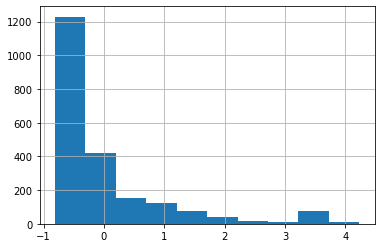

In [42]:
std = StandardScaler()
scaled_fit = std.fit(messi_shots[num_cols_messi])

pd.DataFrame(scaled_fit.transform(messi_shots[num_cols_messi]), columns=num_cols_messi)['statsbomb_xg'].hist();

In [43]:
messi_shots = pd.get_dummies(data=messi_shots, columns=cat_cols_messi, drop_first=True)
messi_shots

,match_id,id,location,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,body_part_id,technique_id,outcome_id,outcome_name,goal,season_name_2005/2006,season_name_2006/2007,season_name_2007/2008,season_name_2008/2009,season_name_2009/2010,season_name_2010/2011,season_name_2011/2012,season_name_2012/2013,season_name_2013/2014,season_name_2014/2015,season_name_2015/2016,season_name_2016/2017,season_name_2017/2018,season_name_2018/2019,season_name_2019/2020,play_pattern_name_From Counter,play_pattern_name_From Free Kick,play_pattern_name_From Goal Kick,play_pattern_name_From Keeper,play_pattern_name_From Kick Off,play_pattern_name_From Throw In,play_pattern_name_Other,play_pattern_name_Regular Play,type_name_Open Play,type_name_Penalty,body_part_name_Left Foot,body_part_name_Other,body_part_name_Right Foot,technique_name_Diving Header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Overhead Kick,technique_name_Volley
0,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,38,93,98,Off T,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,38,93,97,Goal,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,9592,076ce5b0-d566-4378-9839-8186ec060da2,"[115.1, 48.4]",5503,Lionel Andrés Messi Cuccittini,0.113160,"[115.9, 47.0]",0,87,40,93,96,Blocked,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,9592,5656d749-a0c6-4469-bdea-a07ab0919ba9,"[116.1, 33.8]",5503,Lionel Andrés Messi Cuccittini,0.178780,"[120.0, 39.6, 0.2]",0c0db095-ab96-4056-b48b-33145397b7fc,87,40,93,97,Goal,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0
4,9592,c2880ca3-e61a-4a89-8714-4c1fc8dc6620,"[105.2, 36.8]",5503,Lionel Andrés Messi Cuccittini,0.084705,"[106.6, 37.1]",5c1e91a3-5c0c-4507-a966-32387eece9f5,87,38,91,96,Blocked,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,303731,cf0fc241-1826-4478-abde-b9780d25e125,"[106.0, 34.8]",5503,Lionel Andrés Messi Cuccittini,0.262575,"[120.0, 43.5, 0.6000000000000001]",5c227063-fa17-4b80-b23b-88169fc869ba,87,38,93,97,Goal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2158,303731,e43a2545-f307-4bb9-a810-01afb1498351,"[111.7, 27.3]",5503,Lionel Andrés Messi Cuccittini,0.128058,"[120.0, 43.6, 0.2]",e9cdf134-be7b-4693-a769-4eccc3b543f7,87,38,93,97,Goal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2159,303731,1c0c7ac1-f01c-4f6d-9c51-3e97154fa119,"[110.5, 43.7]",5503,Lionel Andrés Messi Cuccittini,0.488662,"[120.0, 39.6, 0.30000000000000004]",0,87,38,93,97,Goal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2160,303731,8034279a-0e32-4be1-8f1d-433a5984e056,"[91.4, 37.9]",5503,Lionel Andrés Messi Cuccittini,0.067505,"[119.4, 38.2, 3.4]",0,62,38,93,115,Saved Off Target,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [44]:
bool_cols_messi = [col for col in messi_shots.nunique()[messi_shots.nunique() == 2].keys() if col not in target_col_messi]

In [45]:
train_messi, test_messi = train_test_split(messi_shots, test_size=.2, random_state=7)

In [46]:
train_messi_X = train_messi[bool_cols_messi + num_cols_messi].reset_index(drop=True)
train_messi_y = train_messi[target_col_messi].reset_index(drop=True)

test_messi_X = test_messi[bool_cols_messi + num_cols_messi].reset_index(drop=True)
test_messi_y = test_messi[target_col_messi].reset_index(drop=True)

In [47]:
lr = LogisticRegression()
lr.fit(train_messi_X, train_messi_y)

lr.predict(test_messi_X)[:10]
test_messi_y[:10]

C:\Users\paul_\anaconda3\envs\matrix\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,goal
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [48]:
accuracy_score(test_messi_y, lr.predict(test_messi_X))

0.8452655889145496

In [49]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
lr.predict_proba(test_messi_X)[:10]

array([[0.85122003, 0.14877997],
       [0.88469857, 0.11530143],
       [0.8865673 , 0.1134327 ],
       [0.88402675, 0.11597325],
       [0.89403995, 0.10596005],
       [0.89432135, 0.10567865],
       [0.95057747, 0.04942253],
       [0.88620407, 0.11379593],
       [0.85911166, 0.14088834],
       [0.92237733, 0.07762267]])

In [51]:
evaluate_models(models, train_messi_X, train_messi_y)

Model: Logistic Regression
Mean Balanced Accuracy Score: 0.8218631146854319
____________

Model: Decision Tree
Mean Balanced Accuracy Score: 0.7408930216972437
____________

Model: Random Forest
Mean Balanced Accuracy Score: 0.7744424897377901
____________



# Run whole 'shots' dataframe through fitted logistic regression model

In [118]:
vis_shots = pd.read_csv('../data/cleaned-data/all_shots.csv', low_memory=False)
vis_shots.head()

,season_name,match_id,id,location,play_pattern_name,player_id,player_name,statsbomb_xg,end_location,key_pass_id,type_id,type_name,body_part_id,body_part_name,technique_id,technique_name,outcome_id,outcome_name,goal
0,2017/2018,9592,b9d68130-0203-48e3-b58e-20a0abd185ff,"[106.0, 57.8]",From Corner,5503,Lionel Andrés Messi Cuccittini,0.026399,"[120.0, 32.2, 4.3]",dd037115-b291-4644-a7c8-3da334699416,87,Open Play,38,Left Foot,93,Normal,98,Off T,0
1,2017/2018,9592,4a9dc002-2667-47b1-b667-8c45d2b0f529,"[90.0, 29.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.025043,"[119.3, 37.5, 2.2]",0,62,Free Kick,40,Right Foot,93,Normal,100,Saved,0
2,2017/2018,9592,c09c6e64-612b-4ba2-931e-5cde922a24b3,"[110.0, 39.5]",From Throw In,5503,Lionel Andrés Messi Cuccittini,0.484256,"[120.0, 37.0, 1.9]",5442dccb-c1de-4753-8b11-a5e9fb175027,87,Open Play,38,Left Foot,93,Normal,97,Goal,1
3,2017/2018,9592,ce357c7c-6df2-4550-8368-213d35e8763a,"[96.0, 21.1]",From Free Kick,5246,Luis Alberto Suárez Díaz,0.046703,"[105.8, 27.5]",0,62,Free Kick,40,Right Foot,93,Normal,96,Blocked,0
4,2017/2018,9592,81af3ea9-1754-4b51-9198-880c533d12cb,"[106.0, 39.6]",From Free Kick,5470,Ivan Rakitić,0.334151,"[116.3, 41.7, 0.30000000000000004]",5032f6d4-8e2e-4fc3-a7c6-095d38f8b1b9,87,Open Play,40,Right Foot,93,Normal,100,Saved,0


Categorise columns/variables

In [119]:
vis_id_col = ['id']
vis_target_col = ['goal']
vis_cat_cols = ['season_name', 'play_pattern_name', 'player_name', 'type_name', 'body_part_name', 'technique_name']
vis_num_cols = ['statsbomb_xg']

Assign dummy variables to category columns/variables

In [120]:
vis_shots = pd.get_dummies(data=vis_shots, columns=vis_cat_cols, drop_first=True)
vis_shots

,match_id,id,location,player_id,statsbomb_xg,end_location,key_pass_id,type_id,body_part_id,technique_id,outcome_id,outcome_name,goal,season_name_2005/2006,season_name_2006/2007,season_name_2007/2008,season_name_2008/2009,season_name_2009/2010,season_name_2010/2011,season_name_2011/2012,season_name_2012/2013,season_name_2013/2014,season_name_2014/2015,season_name_2015/2016,season_name_2016/2017,season_name_2017/2018,season_name_2018/2019,season_name_2019/2020,play_pattern_name_From Counter,play_pattern_name_From Free Kick,play_pattern_name_From Goal Kick,play_pattern_name_From Keeper,play_pattern_name_From Kick Off,play_pattern_name_From Throw In,play_pattern_name_Other,play_pattern_name_Regular Play,player_name_Adriano Correia Claro,player_name_Aleix Vidal Parreu,player_name_Alexandre Dimitri Song-Billong,player_name_Alexis Alejandro Sánchez Sánchez,player_name_Aliaksandr Hleb,player_name_Anderson Luís de Souza,player_name_André Filipe Tavares Gomes,player_name_Andrés Iniesta Luján,player_name_Anssumane Fati,player_name_Antoine Griezmann,player_name_Arda Turan,player_name_Arthur Henrique Ramos de Oliveira Melo,player_name_Arturo Erasmo Vidal Pardo,player_name_Bojan Krkíc Pérez,player_name_Carles Aleña Castillo,player_name_Carles Puyol i Saforcada,player_name_Carles Pérez Sayol,player_name_Clément Lenglet,player_name_Cristian Tello Herrera,player_name_Daniel Alves da Silva,player_name_David Villa Sánchez,player_name_Denis Suárez Fernández,player_name_Dmytro Chygrynskiy,player_name_Eiður Smári Guðjohnsen,player_name_Eric-Sylvain Bilal Abidal,player_name_Francesc Fàbregas i Soler,player_name_Francisco Alcácer García,player_name_Frenkie de Jong,player_name_Gabriel Alejandro Milito,player_name_Gabriel Francisco García de la Torre,player_name_Gerard Deulofeu Lázaro,player_name_Gerard Piqué Bernabéu,player_name_Gianluca Zambrotta,player_name_Giovani dos Santos Ramírez,player_name_Giovanni van Bronckhorst,player_name_Gnégnéri Yaya Touré,player_name_Henrik Larsson,player_name_Héctor Junior Firpo Adames,player_name_Ibrahim Afellay,player_name_Ivan Rakitić,player_name_Javier Alejandro Mascherano,player_name_Javier Pedro Saviola Fernández,player_name_Jeffren Isaac Suárez Bermúdez,player_name_Jonathan dos Santos Ramírez,player_name_Jordi Alba Ramos,player_name_José Edmílson Gomes de Moraes,player_name_José Manuel Rueda Sampedro,player_name_José Martín Cáceres Silva,player_name_José Paulo Bezzera Maciel Júnior,player_name_Juan Isaac Cuenca López,player_name_Juliano Haus Belletti,player_name_Jérémy Mathieu,player_name_Kevin-Prince Boateng,player_name_Lionel Andrés Messi Cuccittini,player_name_Lucas Digne,player_name_Ludovic Giuly,player_name_Luis Alberto Suárez Díaz,player_name_Malcom Filipe Silva de Oliveira,player_name_Manuel Agudo Durán,player_name_Marc Bartra Aregall,player_name_Mark van Bommel,player_name_Martin Braithwaite Christensen,player_name_Martín Montoya Torralbo,player_name_Maximiliano Gastón López,player_name_Maxwell Scherrer Cabelino Andrade,player_name_Munir El Haddadi Mohamed,player_name_Neymar da Silva Santos Junior,player_name_Nélson Cabral Semedo,player_name_Oleguer Presas Renom,player_name_Ousmane Dembélé,player_name_Pedro Eliezer Rodríguez Ledesma,player_name_Philippe Coutinho Correia,player_name_Rafael Alcântara do Nascimento,player_name_Rafael Márquez Álvarez,player_name_Ricard Puig Martí,player_name_Ronald Federico Araújo da Silva,player_name_Ronaldo de Assis Moreira,"player_name_Samuel Eto""o Fils",player_name_Samuel Yves Umtiti,player_name_Sandro Ramírez Castillo,player_name_Santiago Ezquerro Marín,player_name_Sergi Roberto Carnicer,player_name_Sergio Busquets i Burgos,player_name_Seydou Kéita,player_name_Sylvio Mendes Campos Junior,player_name_Thiago Alcântara do Nascimento,player_name_Thiago Motta,player_name_Thierry Henry,player_name_Thomas Vermaelen,player_name_Xavier Hernández Creus,player_name_Yerry Fernando Mina González,player_name_Zlatan Ibrahimović,type_name_Free Kick,type_name_Open Play,type_name_Penalt

Create boolean columns category

In [121]:
vis_bool_cols = [col for col in vis_shots.nunique()[vis_shots.nunique() == 2].keys() if col not in vis_target_col]

Split the dataset into test sets and run it through the model

In [122]:
vis_shots_test_X = vis_shots[vis_bool_cols + vis_num_cols].reset_index(drop=True)
vis_shots_test_y = vis_shots[vis_target_col].reset_index(drop=True)

lr.predict(vis_shots_test_X)
vis_shots_test_y

,goal
0,0
1,0
2,1
3,0
4,0
...,...
7650,0
7651,0
7652,1
7653,0


In [123]:
shot_probability = lr.predict_proba(vis_shots_test_X)

In [124]:
shot_probability

array([[0.9319398 , 0.0680602 ],
       [0.93245059, 0.06754941],
       [0.41231364, 0.58768636],
       ...,
       [0.0836022 , 0.9163978 ],
       [0.80708797, 0.19291203],
       [0.10005103, 0.89994897]])

In [125]:
len(shot_probability)

7655

Transfer results into a dataframe showing the probability of each shot being a goal or not

In [126]:
prob_df = pd.DataFrame(data=shot_probability, columns=["prob_goal", "prob_not_goal"])

In [127]:
prob_df

,prob_goal,prob_not_goal
0,0.931940,0.068060
1,0.932451,0.067549
2,0.412314,0.587686
3,0.923738,0.076262
4,0.660964,0.339036
...,...,...
7650,0.808864,0.191136
7651,0.911276,0.088724
7652,0.083602,0.916398
7653,0.807088,0.192912


In [128]:
prob_df = prob_df.assign(id = vis_shots['id'])
prob_df

,prob_goal,prob_not_goal,id
0,0.931940,0.068060,b9d68130-0203-48e3-b58e-20a0abd185ff
1,0.932451,0.067549,4a9dc002-2667-47b1-b667-8c45d2b0f529
2,0.412314,0.587686,c09c6e64-612b-4ba2-931e-5cde922a24b3
3,0.923738,0.076262,ce357c7c-6df2-4550-8368-213d35e8763a
4,0.660964,0.339036,81af3ea9-1754-4b51-9198-880c533d12cb
...,...,...,...
7650,0.808864,0.191136,497856b8-b067-46f0-a05d-0460263776e8
7651,0.911276,0.088724,8034279a-0e32-4be1-8f1d-433a5984e056
7652,0.083602,0.916398,17c2fd69-d646-41c9-8b1f-b34c210463dd
7653,0.807088,0.192912,01b7fed8-2356-4480-8c1b-53ca8aea55a4


In [129]:
prob_df = prob_df.to_csv('../data/cleaned-data/shot_probability.csv', index=False)